# Working with Geospatial Data in Python

**Data Sources**

- [National Oceanic and Atmospheric Administration's Wrecks and Obstructions Database](https://nauticalcharts.noaa.gov/data/wrecks-and-obstructions.html): collection of known wrecks and obstructions in US coastal waters courtesy of the Coast Survey's Automated Wreck and Obstruction Information System (AWOIS) and the Electronic Navigational Chart (ENC) data
- [Eastern Search & Survey](https://www.facebook.com/Eastern-Search-Survey-109413857123876): provided and gave permission to use coordinates for several hang logs involved in the search for the SS Biela wreck, as well as details and backstory of the search. ESS provides a free, interactive map with all their scanned wreck images on [Google maps](https://www.google.com/maps/d/u/0/viewer?mid=1dMRBuqZSxv1ULdiPi76ZQCiHB0OkW7NV&ll=40.306301090519035%2C-73.53378835388357&z=7)


## Import Python Packages and Data

In [1]:
# Analysis imports
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
import geopy

# Visualization imports
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [2]:
# Set notebook color variables (source: colorbrewer2.org)
brown = '#bf5b17'
yellow = '#ffff99'
green = '#7fc97f'
hotpink = '#f0027f'
grey = '#666666'
peach = '#fdc086'

In [3]:
# Read AWOIS Wreck shapefile into GeoDataFrame
awois_wrecks = gpd.read_file('./data/AWOIS_Wrecks/AWOIS_Wrecks.shp', driver='shapefile')

# Keep only rows in geographic regions B and C (Southern MA to DE)
awois_wrecks = awois_wrecks[awois_wrecks['AREA_ID'].str.contains('B|C')]

awois_wrecks.head()

,RECRD,VESSLTERMS,AREA_ID,CHART,LATDEC,LONDEC,GP_QUALITY,GP_SOURCE,DEPTH,SOUNDING_T,YEARSUNK,HISTORY,REFERENCE,geometry
1093,15129,WRECK,C,12402,40.567114,-74.047717,High,Direct,4,Feet and tenths,None,"LNM09/12, USCG District 1-- Added ""4"" wreck an...",None,POINT (-74.04772 40.56711)
1094,8909,UNKNOWN,C,12214,38.845972,-74.835139,High,Direct,28,Feet and tenths,None,H-10241/94-- OPR-D368-WH; UNCHARTED WRECKAGE A...,None,POINT (-74.83514 38.84597)
1095,11992,UNKNOWN,C,12353,40.618333,-73.08025,High,Direct,50,Feet and tenths,None,\r\n HISTORY\r\n LNM28/90 (7/11/90)-- ADD SYM...,None,POINT (-73.08025 40.61833)
1096,12021,UNKNOWN,C,12214,38.928942,-74.855206,High,Direct,35,Feet and tenths,None,H11104/02--OPR-C303-KR; FOUND A SUNKEN WRECK ...,None,POINT (-74.85521 38.92894)
1097,12026,UNKNOWN,C,12214,38.903281,-74.814119,High,Direct,34,Feet and tenths,None,H11104/02--OPR-C303-KR; FOUND A SUNKEN WRECK ...,None,POINT (-74.81412 38.90328)


In [4]:
awois_wrecks.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
awois_wrecks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1771 entries, 1093 to 5346
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RECRD       1771 non-null   object  
 1   VESSLTERMS  1771 non-null   object  
 2   AREA_ID     1771 non-null   object  
 3   CHART       1765 non-null   object  
 4   LATDEC      1771 non-null   object  
 5   LONDEC      1771 non-null   object  
 6   GP_QUALITY  1750 non-null   object  
 7   GP_SOURCE   1477 non-null   object  
 8   DEPTH       1591 non-null   object  
 9   SOUNDING_T  845 non-null    object  
 10  YEARSUNK    16 non-null     object  
 11  HISTORY     1725 non-null   object  
 12  REFERENCE   28 non-null     object  
 13  geometry    1771 non-null   geometry
dtypes: geometry(1), object(13)
memory usage: 207.5+ KB


In [6]:
# Read AWOIS Obstructions shapefile into GeoDataFrame
awois_obs = gpd.read_file('./data/AWOIS_Obstructions/AWOIS_Obstructions.shp', driver='shapefile')

# Keep only rows in geographic regions B and C (Southern MA to DE)
awois_obs = awois_obs[awois_obs['AREA_ID'].str.contains('B|C')]

awois_obs.head()

,RECRD,VESSLTERMS,AREA_ID,CHART,LATDEC,LONDEC,GP_QUALITY,GP_SOURCE,DEPTH,SOUNDING_T,YEARSUNK,HISTORY,REFERENCE,geometry
1441,15204,OBSTRUCTION,C,12326,40.338361,-73.699722,None,Not Provided,24.7,Meters and tenths,None,H12627/OPR-B310-FH-13: New wreck identified at...,None,POINT (-73.69972 40.33836)
1442,8910,OBSTRUCTION,C,12214,38.821772,-74.829433,High,Direct,0,None,None,HISTORY\r\n H-10241/94-- OPR-D368-WH; UNCHART...,None,POINT (-74.82943 38.82177)
1443,8911,OBSTRUCTION,C,12214,38.840908,-74.837733,High,Direct,12.4,Meters and tenths,None,HISTORY\r\n H-10241/94-- OPR-D368-WH; UNCHART...,None,POINT (-74.83773 38.84091)
1444,8777,OBSTRUCTION,C,12214,38.803025,-74.947608,High,Direct,11.9,Meters and tenths,None,HISTORY\r\n H10444/92-93; FE-387/93-- OPR-D36...,None,POINT (-74.94761 38.80302)
1445,8778,OBSTRUCTION,C,12214,38.805506,-74.919508,High,Direct,11.5,Meters and tenths,None,HISTORY\r\n H10444/92-93; FE-387/93-- OPR-D36...,None,POINT (-74.91951 38.80551)


In [7]:
awois_obs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1218 entries, 1441 to 5274
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RECRD       1218 non-null   object  
 1   VESSLTERMS  1218 non-null   object  
 2   AREA_ID     1218 non-null   object  
 3   CHART       1211 non-null   object  
 4   LATDEC      1218 non-null   object  
 5   LONDEC      1218 non-null   object  
 6   GP_QUALITY  1203 non-null   object  
 7   GP_SOURCE   1203 non-null   object  
 8   DEPTH       1074 non-null   object  
 9   SOUNDING_T  759 non-null    object  
 10  YEARSUNK    2 non-null      object  
 11  HISTORY     1208 non-null   object  
 12  REFERENCE   0 non-null      object  
 13  geometry    1218 non-null   geometry
dtypes: geometry(1), object(13)
memory usage: 142.7+ KB


In [8]:
# Import ENC Wrecks info from CSV file into temp DataFrame
tmp_enc = pd.read_csv('./data/ENC_Wrecks/ENC_Wrecks.csv')

tmp_enc.head()

,recrd,vesslterms,feature_type,chart,latdec,londec,gp_quality,depth,sounding_type,yearsunk,history,quasou,watlev
0,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1218/15",9.569000,-79.037834,NaN,NaN,NaN,NaN,NaN,NaN,always dry
1,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1218/15",9.557486,-78.879013,NaN,NaN,NaN,NaN,NaN,NaN,always dry
2,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1218/15",9.554478,-78.943573,NaN,NaN,NaN,NaN,NaN,NaN,always dry
3,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1453/14",18.231279,-72.541992,NaN,NaN,NaN,NaN,NaN,NaN,always dry
4,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1453/14",18.228279,-72.534180,NaN,NaN,NaN,NaN,NaN,NaN,always dry


In [9]:
# Convert into a GeoDataFrame (the ENC_Wrecks shapefile used
#    WGS 84, which is EPSG code 4326)
enc_wrecks = gpd.GeoDataFrame(tmp_enc,
                              geometry=gpd.points_from_xy(
                                  tmp_enc.londec,
                                  tmp_enc.latdec),
                              crs='EPSG:4326')

# Alternative way to set CRS if not done with `crs` parameter
# enc_wrecks.crs = 'EPSG:4326'

enc_wrecks.head()

,recrd,vesslterms,feature_type,chart,latdec,londec,gp_quality,depth,sounding_type,yearsunk,history,quasou,watlev,geometry
0,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1218/15",9.569000,-79.037834,NaN,NaN,NaN,NaN,NaN,NaN,always dry,POINT (-79.03783 9.56900)
1,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1218/15",9.557486,-78.879013,NaN,NaN,NaN,NaN,NaN,NaN,always dry,POINT (-78.87901 9.55749)
2,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1218/15",9.554478,-78.943573,NaN,NaN,NaN,NaN,NaN,NaN,always dry,POINT (-78.94357 9.55448)
3,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1453/14",18.231279,-72.541992,NaN,NaN,NaN,NaN,NaN,NaN,always dry,POINT (-72.54199 18.23128)
4,NaN,NaN,Wrecks - Visible,"US,US,reprt,L-1453/14",18.228279,-72.534180,NaN,NaN,NaN,NaN,NaN,NaN,always dry,POINT (-72.53418 18.22828)


In [10]:
enc_wrecks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11495 entries, 0 to 11494
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   recrd          0 non-null      float64 
 1   vesslterms     86 non-null     object  
 2   feature_type   11462 non-null  object  
 3   chart          11490 non-null  object  
 4   latdec         11495 non-null  float64 
 5   londec         11495 non-null  float64 
 6   gp_quality     0 non-null      float64 
 7   depth          2971 non-null   float64 
 8   sounding_type  148 non-null    object  
 9   yearsunk       0 non-null      float64 
 10  history        361 non-null    object  
 11  quasou         8816 non-null   object  
 12  watlev         11478 non-null  object  
 13  geometry       11495 non-null  geometry
dtypes: float64(6), geometry(1), object(7)
memory usage: 1.2+ MB


In [11]:
# Remove points outside the general area of interest
#   Longitude extent for area of interest = [-74.95, -63.6]
#   Latitude extent for area of interest = [38.8, 41.8]

# Create a polygon using the lat/lon values
enc_extent = shapely.geometry.box(-74.95, 38.8, -63.6, 41.8, ccw=True)

In [12]:
# Create mask for points of ENC wrecks that fall in polygon
in_extent = enc_wrecks['geometry'].within(enc_extent)

# Update GeoDataFrame keeping only those points
enc_wrecks = enc_wrecks[in_extent]
enc_wrecks.head()

,recrd,vesslterms,feature_type,chart,latdec,londec,gp_quality,depth,sounding_type,yearsunk,history,quasou,watlev,geometry
921,NaN,NaN,"Wrecks - Submerged, nondangerous","US,US,graph,Chart 12364",41.022946,-73.185735,NaN,34.1,NaN,NaN,NaN,least depth known,always under water/submerged,POINT (-73.18573 41.02295)
922,NaN,NaN,"Wrecks - Submerged, nondangerous","US,US,graph,Chart 12363",41.029144,-73.175032,NaN,31.3,NaN,NaN,NaN,least depth known,always under water/submerged,POINT (-73.17503 41.02914)
923,NaN,NaN,"Wrecks - Submerged, dangerous","US,US,graph,DD-22759",40.975046,-73.260620,NaN,18.8,NaN,NaN,NaN,least depth known,always under water/submerged,POINT (-73.26062 40.97505)
924,NaN,NaN,"Wrecks - Submerged, dangerous","US,US,reprt,DD-24912",40.948703,-73.202178,NaN,10.3,NaN,NaN,NaN,least depth known,always under water/submerged,POINT (-73.20218 40.94870)
925,NaN,NaN,"Wrecks - Submerged, nondangerous","US,US,graph,BP-191410",41.029722,-73.171556,NaN,31.0,NaN,NaN,NaN,least depth known,always under water/submerged,POINT (-73.17156 41.02972)


In [13]:
enc_wrecks.shape

(1989, 14)

In [14]:
enc_wrecks['vesslterms'].value_counts()

Hen And Chickens         1
Kerry Anne               1
USCSS Robert J Walker    1
F/V Creole Belle         1
Name: vesslterms, dtype: int64

## Check and Convert Coordinate Reference Systems

When combining geospatial datasets, the coordinate reference systems for each set should match (otherwise, you'll introduce error). Geopandas makes checking the CRS easy with the `.crs` attribute, which displays the EPSG code and other metadata for that GeoDataFrame's CRS. The AWOIS datasets both have coordinates in NAD 83 (EPSG code `4269`) and the ENC dataset uses WGS 84 (EPSG code `4326`), which is a common CRS for web data.

All maps in the notebook will be generated with `folium`, which assumes datasets are in WGS 84, so all GeoDataFrames are converted to this CRS to start. Web tile providers typically use the spherical mercator (aka web mercator, EPSG code `3857`) projection, but `folium` does the projection conversion under the hood automatically for you, so it's not necessary to layer the projection onto the dataset coordinates.

The [Spatial Reference website](www.spatialreference.org) is a good resource to look up EPSG codes.

In [15]:
awois_wrecks.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
# Check the units for NAD 83 CRS
awois_wrecks.crs.axis_info[0].unit_name

'degree'

In [17]:
awois_obs.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
enc_wrecks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
# Check the units for WGS 84 CRS
enc_wrecks.crs.axis_info[0].unit_name

'degree'

In [20]:
# Convert AWOIS datasets from NAD 83 to WGS 84

# Alternative: gdf.to_crs('EPSG:4326', inplace=True)
awois_wrecks.to_crs(epsg=4326, inplace=True)
awois_obs.to_crs(epsg=4326, inplace=True)

# Confirm the conversion worked and all CRSs are same
print('AWOIS Wrecks CRS: {}'.format(awois_wrecks.crs))
print('AWOIS Obstructions CRS: {}'.format(awois_obs.crs))
print('ENC Wrecks CRS: {}'.format(enc_wrecks.crs))

AWOIS Wrecks CRS: epsg:4326
AWOIS Obstructions CRS: epsg:4326
ENC Wrecks CRS: EPSG:4326


## Combine and Clean Datasets

The following code performs some light data cleaning. Namely it consolidates the categories for each type of object which will be used to color the data points in the map. It also separates all the data into two GeoDataFrames by whether the object is identified / visible or not.

- Consolidate the `VESSLTERMS` values in the AWOIS datasets into new column `OBJTYPE`, adding a `KNOWN WRECK` label for low count values that appear to be a name of a vessel
- Add `OBJTYPE` column to ENC dataset and label visible wrecks as `KNOWN WRECK`, everything else as `UNKNOWN`
- Save all known/visible wrecks into separate GeoDataFrame
- Combine everything else into an unknown object GeoDataFrame

In [21]:
awois_wrecks['VESSLTERMS'].value_counts()

UNKNOWN                 1012
WRECK                    160
OBSTRUCTION                5
SHINNECOCK                 4
YANKEE                     3
                        ... 
DUAL BARGES WRECK          1
BERANGER                   1
BIG O                      1
ORMOND                     1
CHARLIES LAST CHANCE       1
Name: VESSLTERMS, Length: 567, dtype: int64

In [22]:
awois_obs['VESSLTERMS'].value_counts()

OBSTRUCTION    1207
FISH HAVEN        6
UNKNOWN           4
DUMP SITE         1
Name: VESSLTERMS, dtype: int64

In [23]:
# Helper function to consolidate categories for AWOIS datasets
def obj_cat_awois(row):
    """
    Retains `VESSLTERMS` values for main categories, replaces low-count
        ones with `KNOWN WRECK` (assumes the value was the name of
        the vessel).

    :param row: row of GeoDataFrame with a `VESSLTERMS` column that
        contains a string describing the vessel
    :return: str of what that row's new, consolidated category is
    
    >>>gdf['consol_cats'] = gdf.apply(obj_cat_awois, axis=1)
    """
    cat = row['VESSLTERMS']
    
    if cat in ['UNKNOWN', 'WRECK', 'OBSTRUCTION', 'FISH HAVEN', 'DUMP SITE']:
        return cat
    else:
        return 'KNOWN WRECK'

awois_wrecks['OBJTYPE'] = awois_wrecks.apply(obj_cat_awois, axis=1)
awois_obs['OBJTYPE'] = awois_obs.apply(obj_cat_awois, axis=1)

In [24]:
awois_wrecks['OBJTYPE'].value_counts()

UNKNOWN        1012
KNOWN WRECK     593
WRECK           160
OBSTRUCTION       5
FISH HAVEN        1
Name: OBJTYPE, dtype: int64

In [25]:
awois_obs['OBJTYPE'].value_counts()

OBSTRUCTION    1207
FISH HAVEN        6
UNKNOWN           4
DUMP SITE         1
Name: OBJTYPE, dtype: int64

In [26]:
enc_wrecks['feature_type'].value_counts()

Wrecks - Submerged, dangerous       1204
Wrecks - Submerged, nondangerous     519
Wrecks - Visible                     257
distributed remains of wreck           5
Name: feature_type, dtype: int64

In [27]:
enc_wrecks['vesslterms'].value_counts()

Hen And Chickens         1
Kerry Anne               1
USCSS Robert J Walker    1
F/V Creole Belle         1
Name: vesslterms, dtype: int64

In [28]:
# Helper function to create categories for ENC dataset
def obj_cat_enc(row):
    """
    Creates two categories of vessel: `KNOWN WRECK` is for visible
        wrecks or for ones that have a name in the `vesslterms` column,
        `WRECK` is for everything else.
        
    :param row: row of GeoDataFrame with both `feature_type` and`vesslterms`
        columns
    :return: str of what that row's new category is
    
    >>>gdf['consol_cats'] = gdf.apply(obj_cat_enc, axis=1)
    """
    if (row['feature_type'] == 'Wrecks - Visible') or (type(row['vesslterms']) is str):
        return 'KNOWN WRECK'
    else:
        return 'WRECK'

enc_wrecks['OBJTYPE'] = enc_wrecks.apply(obj_cat_enc, axis=1)

In [29]:
enc_wrecks['OBJTYPE'].value_counts()

WRECK          1728
KNOWN WRECK     261
Name: OBJTYPE, dtype: int64

In [30]:
# Add key column to track where rows came from before combining
awois_wrecks['IDX'] = ['AWW_{}'.format(n) for n in range(1, awois_wrecks.shape[0] + 1)]
awois_obs['IDX'] = ['AWO_{}'.format(n) for n in range(1, awois_obs.shape[0] + 1)]
enc_wrecks['IDX'] = ['ENC_{}'.format(n) for n in range(1, enc_wrecks.shape[0] + 1)]

In [31]:
print(awois_wrecks.columns)
print(awois_obs.columns)
print(enc_wrecks.columns)

Index(['RECRD', 'VESSLTERMS', 'AREA_ID', 'CHART', 'LATDEC', 'LONDEC',
       'GP_QUALITY', 'GP_SOURCE', 'DEPTH', 'SOUNDING_T', 'YEARSUNK', 'HISTORY',
       'REFERENCE', 'geometry', 'OBJTYPE', 'IDX'],
      dtype='object')
Index(['RECRD', 'VESSLTERMS', 'AREA_ID', 'CHART', 'LATDEC', 'LONDEC',
       'GP_QUALITY', 'GP_SOURCE', 'DEPTH', 'SOUNDING_T', 'YEARSUNK', 'HISTORY',
       'REFERENCE', 'geometry', 'OBJTYPE', 'IDX'],
      dtype='object')
Index(['recrd', 'vesslterms', 'feature_type', 'chart', 'latdec', 'londec',
       'gp_quality', 'depth', 'sounding_type', 'yearsunk', 'history', 'quasou',
       'watlev', 'geometry', 'OBJTYPE', 'IDX'],
      dtype='object')


In [32]:
# Combine known wrecks into one dataset
cols = ['IDX', 'OBJTYPE', 'geometry']

known_wrecks = awois_wrecks[awois_wrecks['OBJTYPE'] == 'KNOWN WRECK'][cols].append(
                   enc_wrecks[enc_wrecks['OBJTYPE'] == 'KNOWN WRECK'][cols],
                   ignore_index=True)

known_wrecks.head()

,IDX,OBJTYPE,geometry
0,AWW_28,KNOWN WRECK,POINT (-74.21987 39.32651)
1,AWW_30,KNOWN WRECK,POINT (-72.48330 40.83331)
2,AWW_31,KNOWN WRECK,POINT (-74.29959 39.25012)
3,AWW_40,KNOWN WRECK,POINT (-74.56627 38.90012)
4,AWW_43,KNOWN WRECK,POINT (-74.50172 39.11655)


In [33]:
known_wrecks['OBJTYPE'].value_counts()

KNOWN WRECK    854
Name: OBJTYPE, dtype: int64

In [34]:
# Combine everything unknown into another dataset
unknown = awois_wrecks[awois_wrecks['OBJTYPE'] != 'KNOWN WRECK'][cols].append(
              awois_obs[cols],
              ignore_index=True).append(
                  enc_wrecks[enc_wrecks['OBJTYPE'] != 'KNOWN WRECK'][cols],
                  ignore_index=True)

unknown.head()

,IDX,OBJTYPE,geometry
0,AWW_1,WRECK,POINT (-74.04772 40.56711)
1,AWW_2,UNKNOWN,POINT (-74.83514 38.84597)
2,AWW_3,UNKNOWN,POINT (-73.08025 40.61833)
3,AWW_4,UNKNOWN,POINT (-74.85520 38.92895)
4,AWW_5,UNKNOWN,POINT (-74.81412 38.90329)


In [35]:
unknown['OBJTYPE'].value_counts()

WRECK          1888
OBSTRUCTION    1212
UNKNOWN        1016
FISH HAVEN        7
DUMP SITE         1
Name: OBJTYPE, dtype: int64

In [36]:
# Check that re-configured GDFs have same shape as originals
awois_wrecks.shape[0] + awois_obs.shape[0] + enc_wrecks.shape[0] == known_wrecks.shape[0] + unknown.shape[0]

True

## Generate Simulated Data for Other Obstructions

In [37]:
# Import ESS search targets into GeoDataFrame
targets = gpd.read_file('./data/Targets/targets.shp', driver='shapefile')

targets

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,geometry
0,100,None,None,None,None,None,-1,0,-1,None,None,POINT (-71.17340 40.17867)
1,67,None,None,None,None,None,-1,0,-1,None,None,POINT (-71.16652 40.16950)
2,TRAVIS,None,None,None,None,None,-1,0,-1,None,None,POINT (-71.14201 40.18970)
3,53,None,None,None,None,None,-1,0,-1,None,None,POINT (-70.92393 40.14858)
4,BIG_BOAT,None,None,None,None,None,-1,0,-1,None,None,POINT (-70.88633 40.23100)
5,ANCHOR,None,None,None,None,None,-1,0,-1,None,None,POINT (-70.89017 40.23780)
6,WRECK,None,None,None,None,None,-1,0,-1,None,None,POINT (-70.83627 40.31670)
7,FEW_FISH,None,None,None,None,None,-1,0,-1,None,None,POINT (-70.95399 40.37145)
8,SAKONNET,None,None,None,None,None,-1,0,-1,None,None,POINT (-71.09143 40.66955)


In [38]:
# Check CRS
targets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
# Keep only relevant columns
targets = targets.loc[:, ['geometry', 'Name']]

# Add/rename columns to match other GeoDataFrames
targets.columns = ['geometry', 'IDX']
targets['OBJTYPE'] = 'UNKNOWN'

In [40]:
targets

,geometry,IDX,OBJTYPE
0,POINT (-71.17340 40.17867),100,UNKNOWN
1,POINT (-71.16652 40.16950),67,UNKNOWN
2,POINT (-71.14201 40.18970),TRAVIS,UNKNOWN
3,POINT (-70.92393 40.14858),53,UNKNOWN
4,POINT (-70.88633 40.23100),BIG_BOAT,UNKNOWN
5,POINT (-70.89017 40.23780),ANCHOR,UNKNOWN
6,POINT (-70.83627 40.31670),WRECK,UNKNOWN
7,POINT (-70.95399 40.37145),FEW_FISH,UNKNOWN
8,POINT (-71.09143 40.66955),SAKONNET,UNKNOWN


In [41]:
# Generate additional random points to simulate other "hangs"

# Set random seed
np.random.seed(42)

# Generate n uniformly distributed x, y values over different areas
n = 100

lon_vals = np.concatenate((np.random.uniform(-72.9, -71.9, size=n),
                           np.random.uniform(-71.98, -70.57, size=2*n),
                           np.random.uniform(-71.22, -70.62, size=n),
                           np.random.uniform(-70.58, -69.6, size=n)))

lat_vals = np.concatenate((np.random.uniform(39.6, 40.7, size=n),
                           np.random.uniform(39.8, 40.97, size=2*n),
                           np.random.uniform(39.85, 40.45, size=n),
                           np.random.uniform(39.9, 41.05, size=n)))

# Zip coordinates together as Points
simu_points = [shapely.geometry.Point(lon, lat) for lon, lat in zip(lon_vals, lat_vals)]

In [42]:
# Create GeoDataFrame of simulated points
simu_obs = gpd.GeoDataFrame(simu_points, columns=['geometry'], crs='EPSG:4326')

# Add columns to match other GeoDataFrames
simu_obs['IDX'] = ['SIM_{}'.format(n) for n in range(1, simu_obs.shape[0] + 1)]
simu_obs['OBJTYPE'] = 'UNKNOWN'

print(simu_obs.shape)
simu_obs.head()

(500, 3)


,geometry,IDX,OBJTYPE
0,POINT (-72.52546 40.36798),SIM_1,UNKNOWN
1,POINT (-71.94929 40.18971),SIM_2,UNKNOWN
2,POINT (-72.16801 39.94048),SIM_3,UNKNOWN
3,POINT (-72.30134 40.49517),SIM_4,UNKNOWN
4,POINT (-72.74398 40.35320),SIM_5,UNKNOWN


In [43]:
simu_obs.shape

(500, 3)

## Helper Functions for Mapping Data

In [44]:
# Helper function to display a folium map in Jupyter notebook
def display_map(m, filename):
    """
    Helper code to ensure the folium map will display
        in different browsers when viewing the Jupyter
        notebook.
    Side effect: saves a local copy of the HTML version
        of the map.
    
    :param m: a folium map
    :param filename: str for map filename to save a copy locally
    :return: IFrame object displaying the saved map
    """
    path_fmt = './maps/{}'.format(filename)
    from IPython.display import IFrame
    m.save(path_fmt)
    return (IFrame(path_fmt,
                   width='100%',
                   height='500px'))


In [45]:
# Helper function to instantiate a generic folium.Map

def make_map(layers=None, location=[40.5, -71.5], zoom_start=8):
    """
    Creates a folium.Map object with consistent parameters
        to use as basemap for all maps in notebook

    :param layers: list or None, FeatureGroup layers to add to map.
        Default is None
    :param location: list of lat/lon coordinate pair of where to
        center the map. Assumes WGS 84 CRS for coordinates
    :param zoom_start: the zoom level of the map
    :return: folium.Map object
    """

    m = folium.Map(location=location,
                   tiles="stamenterrain",
                   zoom_start=zoom_start)
    
    if layers is not None:
        for l in layers:
            m.add_child(l)

    return m

In [46]:
# Helper function to color map points differently by object type
def color_obj(objtype):
    """
    Assigns color brewer qualitative scheme to objects
        depending on the type.
    :param obj: str, category of object type
    :return: str, hexcode for map icon color
    """
    labels = ['KNOWN WRECK',
              'WRECK',
              'OBSTRUCTION',
              'FISH HAVEN',
              'DUMP SITE',
              'UNKNOWN']

    colors = [brown,
              brown,
              yellow,
              green,
              hotpink,
              grey]

    color_dict = dict(zip(labels, colors))
    return color_dict.get(objtype, grey)

In [47]:
# Helper function to create and return a FeatureGroup of circles
#    (This enables functionality on folium map to toggle whether
#    a FeatureGroup layer is visible or not)
def create_featuregroup(gdf, fgname):
    """
    Creates a folium FeatureGroup with given `fgname`, then iterates
        over given GeoDataFrame (`gdf`) to create and add folium.Circle
        markers to the FeatureGroup. Returns the FeatureGroup
    
    :param gdf: a GeoDataFrame, must have `OBJTYPE` column for color
        function to work
    :param fgname: str, the name for the FeatureGroup
    :return: folium.FeatureGroup object
    """
    # Create the FeatureGroup
    fg = folium.FeatureGroup(name=fgname,
                             overlay=True,
                             control=True,
                             show=True)

    # Iterate over GeoDataFrame, create circles for each row, add to FeatureGroup
    for idx, row in gdf.iterrows():
        lat = row['geometry'].y
        lon = row['geometry'].x
        folium.Circle(location=[lat, lon],
                      radius=10,
                      color=color_obj(row['OBJTYPE'])).add_to(fg)

    return fg

In [48]:
# Helper function for meter-nautical mile conversions

NM_CONVERSION = 0.0005399565

def nm_to_m(nm):
    """
    Converts nautical miles to meters
    
    :param nm: float, nautical miles
    :return: float
    """
    return nm / NM_CONVERSION

def m_to_nm(m):
    """
    Converts nautical miles to meters
    
    :param nm: float, nautical miles
    :return: float
    """
    return m * NM_CONVERSION

## The Search Begins

In [49]:
# Create a FeatureGroup for each set of points that will
#    be plotted for most maps
unk_layer = create_featuregroup(unknown, 'Unknown Objs')
kwn_layer = create_featuregroup(known_wrecks, 'Known Wrecks')
simu_layer = create_featuregroup(simu_obs, 'Simulated Objs')
targs_layer = create_featuregroup(targets, 'Targets')
layers_all = [unk_layer, kwn_layer, simu_layer, targs_layer]

In [50]:
# Create a map of obstructions

m = make_map(layers=layers_all)

# Add LayerControl to toggle layers on/off 
folium.LayerControl(collapsed=False).add_to(m)

# Display map
display_map(m, 'm_1.html')

### Establish Search Area Given Two Estimated Locations of Collision

Insurance archival holdings gave an original estimate of where the collision happened, but conflicting press reports left a lot of uncertainty for modern wreck hunters. This resulted in an excessively large search area, and combined with the collision happening in deep waters, made the search difficult for a long time. However, further research uncovered a legal claim where the captains of both vessels reported coordinates for the collision, which in turn greatly reduced the search area. For analysis purposes, the coordinates are assumed to be in CRS NAD 27 (EPSG code `4267`).

The new search area looked at all known 'hangs' in a ~700 square nautical mile area and reviewed them for likely candidates.

In [51]:
# Estimated collision coordinates per Supreme Court filing
lat_a = 40 + 9/60
lon_a = -71
coord_a = gpd.GeoSeries(shapely.geometry.Point(lon_a, lat_a),
                        crs='EPSG:4267')  # Uses NAD 27 as approximate CRS

lat_b = 40 + 8/60
lon_b = -(70 + 46/60)
coord_b = gpd.GeoSeries(shapely.geometry.Point(lon_b, lat_b),
                        crs='EPSG:4267')  # Uses NAD 27 as approximate CRS

# Combine into a linestring oject
coords_ab = gpd.GeoSeries(shapely.geometry.LineString([coord_a[0], coord_b[0]]),
                          crs='EPSG:4267')

# Convert CRS into projected coordinates to calculate distances in meters
coords_ab = coords_ab.to_crs('EPSG:3857')

In [52]:
# Check the CRS unit of measurement
print(coords_ab.crs.axis_info[0].unit_name)

metre


In [76]:
coords_ab.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
# Calculate distance between two estimated coordinates
est_dist = coords_ab.length[0]
print('Distance between coordinates in meters: {0:,.0f}'.format(est_dist))
print('Distance between coordinates in nautical miles: {0:.1f}'.format(m_to_nm(est_dist)))

Distance between coordinates in meters: 26,089
Distance between coordinates in nautical miles: 14.1


In [54]:
# Example to show the warning if you try to calculate distance
#    using a geographic (non-projected) CRS
coords_ab.to_crs('EPSG:4326').length

/var/folders/n8/0kbk03fs1k9_ltg9yp460fr00000gn/T/ipykernel_54259/2719620611.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  coords_ab.to_crs('EPSG:4326').length


0    0.23394
dtype: float64

In [55]:
# Calculate the centroid between the two points
centroid = coords_ab.centroid

# Create a buffer around the centroid of ~700 squared nautical miles
buff = centroid.buffer(27645)
buff

0    POLYGON ((-7863003.000 4886557.014, -7863136.1...
dtype: geometry

In [56]:
# Calculate the area of the buffer, convert from
#    square meters to square nautical miles
m_to_nm(np.sqrt(buff.area[0]))**2

698.8802082465727

In [57]:
# Create basemap
centroid_lon = centroid.to_crs('epsg:4326')[0].x
centroid_lat = centroid.to_crs('epsg:4326')[0].y

m_2 = make_map(layers=layers_all, 
               location=[centroid_lat, centroid_lon],
               zoom_start=9)

# Plot the 700nm^2 buffer around the centroid between the coordinates
folium.GeoJson(buff.to_crs('epsg:4326').to_json(), name="Search Area").add_to(m_2)

# Plot the approximate coordinates for the Biela
folium.Circle([coord_a[0].y, coord_a[0].x], radius=10, color=peach).add_to(m_2)
folium.Circle([coord_b[0].y, coord_b[0].x], radius=10, color=peach).add_to(m_2)

# Add LayerControl to toggle layers on/off 
folium.LayerControl(collapsed=False).add_to(m_2)

# Display map
display_map(m_2, 'm_2.html')

### Find All un-Identified Hangs that are Within the Search Area

In [58]:
# Combine all unknown items into one GeoDataFrame
all_unknown = unknown.append(simu_obs,
                             ignore_index=True).append(targets,
                                                        ignore_index=True)

# Convert to projected CRS
all_unknown.to_crs('EPSG:3857', inplace=True)

print(all_unknown.shape)
all_unknown.head(15)

(4633, 3)


,IDX,OBJTYPE,geometry
0,AWW_1,WRECK,POINT (-8242954.142 4948699.211)
1,AWW_2,UNKNOWN,POINT (-8330609.567 4699632.337)
2,AWW_3,UNKNOWN,POINT (-8135256.194 4956207.612)
3,AWW_4,UNKNOWN,POINT (-8332843.241 4711499.019)
4,AWW_5,UNKNOWN,POINT (-8328269.471 4707827.719)
5,AWW_6,UNKNOWN,POINT (-8314335.457 4714436.992)
6,AWW_7,UNKNOWN,POINT (-8312186.116 4716385.592)
7,AWW_8,UNKNOWN,POINT (-8313332.689 4705277.504)
8,AWW_9,UNKNOWN,POINT (-8311459.416 4705823.393)
9,AWW_10,UNKNOWN,POINT (-8311772.000 4706845.591)


In [59]:
all_unknown.tail()

,IDX,OBJTYPE,geometry
4628,BIG_BOAT,UNKNOWN,POINT (-7891030.160 4899567.571)
4629,ANCHOR,UNKNOWN,POINT (-7891457.627 4900559.140)
4630,WRECK,UNKNOWN,POINT (-7885457.506 4912071.554)
4631,FEW_FISH,UNKNOWN,POINT (-7898562.037 4920068.114)
4632,SAKONNET,UNKNOWN,POINT (-7913861.787 4963721.873)


In [60]:
# Create a Boolean index for all_unknown points that fall within the buffer
s_idx = all_unknown['geometry'].within(buff.loc[0])
s_idx

0       False
1       False
2       False
3       False
4       False
        ...  
4628     True
4629     True
4630     True
4631    False
4632    False
Length: 4633, dtype: bool

In [61]:
sum(s_idx)

62

In [62]:
# Calculate and filter for points within the search area buffer
search_points = all_unknown.loc[s_idx]

print(search_points.shape)
search_points.head(15)

(62, 3)


,IDX,OBJTYPE,geometry
4066,ENC_1932,WRECK,POINT (-7870134.768 4895310.027)
4087,ENC_1953,WRECK,POINT (-7903718.188 4881611.603)
4088,ENC_1954,WRECK,POINT (-7887047.983 4868362.645)
4225,SIM_102,UNKNOWN,POINT (-7912885.662 4884262.007)
4231,SIM_108,UNKNOWN,POINT (-7894185.276 4898867.078)
4244,SIM_121,UNKNOWN,POINT (-7886040.751 4868251.581)
4245,SIM_122,UNKNOWN,POINT (-7872126.025 4872474.801)
4261,SIM_138,UNKNOWN,POINT (-7902430.753 4878111.417)
4280,SIM_157,UNKNOWN,POINT (-7907278.228 4885145.334)
4281,SIM_158,UNKNOWN,POINT (-7893232.765 4898664.496)


In [63]:
search_points.tail()

,IDX,OBJTYPE,geometry
4520,SIM_397,UNKNOWN,POINT (-7870839.292 4869705.059)
4627,53,UNKNOWN,POINT (-7895215.773 4887557.069)
4628,BIG_BOAT,UNKNOWN,POINT (-7891030.160 4899567.571)
4629,ANCHOR,UNKNOWN,POINT (-7891457.627 4900559.140)
4630,WRECK,UNKNOWN,POINT (-7885457.506 4912071.554)


In [64]:
# Retrieve target search points
top = targets.loc[:9, :].to_crs('epsg:3857')
top

,geometry,IDX,OBJTYPE
0,POINT (-7922986.646 4891940.187),100,UNKNOWN
1,POINT (-7922220.768 4890604.216),67,UNKNOWN
2,POINT (-7919492.327 4893547.381),TRAVIS,UNKNOWN
3,POINT (-7895215.773 4887557.069),53,UNKNOWN
4,POINT (-7891030.160 4899567.571),BIG_BOAT,UNKNOWN
5,POINT (-7891457.627 4900559.140),ANCHOR,UNKNOWN
6,POINT (-7885457.506 4912071.554),WRECK,UNKNOWN
7,POINT (-7898562.037 4920068.114),FEW_FISH,UNKNOWN
8,POINT (-7913861.787 4963721.873),SAKONNET,UNKNOWN


In [65]:
# Combine points into one geometry to find convex hull
union = top['geometry'].unary_union

# Create convex hull and calculate new search area
cvxhull = gpd.GeoSeries(union.convex_hull, crs='EPSG:3857')
cvxhull_area_m2 = cvxhull[0].area
cvxhull_area_nm2 = m_to_nm(np.sqrt(cvxhull_area_m2))**2

print('Original search area in square meters: {0: ,.0f}'.format(buff[0].area))
print('New search area in square meters: {0:,.0f}'.format(cvxhull_area_m2))
print('New search area in square nautical miles: {0: ,.0f}'.format(cvxhull_area_nm2))

Original search area in square meters:  2,397,094,716
New search area in square meters: 1,633,756,741
New search area in square nautical miles:  476


In [66]:
# Create basemap
m_3 = make_map(layers=[targs_layer],
               location=[40.29, -71.02],
               zoom_start=9)

# Plot the reduced search area
folium.GeoJson(cvxhull.to_crs('epsg:4326').to_json(), name="Search Area").add_to(m_3)

# Plot the approximate coordinates for the Biela
folium.Circle([coord_a[0].y, coord_a[0].x], radius=10, color=peach).add_to(m_3)
folium.Circle([coord_b[0].y, coord_b[0].x], radius=10, color=peach).add_to(m_3)

# Add a popup to show lat, lon where user clicks
folium.features.LatLngPopup().add_to(m_3)

# Add LayerControl to toggle layers on/off 
folium.LayerControl(collapsed=False).add_to(m_3)

# Display map
display_map(m_3, 'm_3.html')

## Plan the Scans (Geocoding Example)

After narrowing down the promising points within the search area, the next step is to plot the course for a day trip to scan each hang log. ESS is based out of Montauk, NY, therefore the round trip journey needs to include the coordinates there, too. Geocoding is a good tool for the job.

**Geocoding** is a lookup system that finds the coordinates for given addresses, landmarks, or named entities, or vice versa. To use it in Python, you need to have `geopy` installed in your environment, then specify which service provider you want to use - some are free, some are paid, and each one has different usage policies. `geopy` doesn't provide the services itself, it's a wrapper to consistently access the APIs of various geocoders.

This example uses the OpenStreetMap service provider `Nominatim` to find coordinates for Montauk, NY. Note that there are call limits when looking up entities, and if the provider can't find a match in it's database, it will likely throw an error.

In [67]:
geolocator = geopy.geocoders.Nominatim(user_agent='gis_analysis')
montauk = geolocator.geocode('Montauk, NY')

In [68]:
print(montauk)
print(montauk.latitude, montauk.longitude)

Montauk, Suffolk County, New York, 11954, United States
41.043629800000005 -71.94387532055404


In [69]:
# Create a GeoSeries for the Montauk coordinates
montauk_coords = gpd.GeoSeries(shapely.geometry.Point(montauk.longitude,
                                                      montauk.latitude), 
                               crs='EPSG:4326')

In [70]:
# Combine Montauk coordinates with scan stops
stops = montauk_coords.append(targets.loc[:9, 'geometry'],
                              ignore_index=True).append(montauk_coords,
                                                        ignore_index=True)

stops

0     POINT (-71.94388 41.04363)
1     POINT (-71.17340 40.17867)
2     POINT (-71.16652 40.16950)
3     POINT (-71.14201 40.18970)
4     POINT (-70.92393 40.14858)
5     POINT (-70.88633 40.23100)
6     POINT (-70.89017 40.23780)
7     POINT (-70.83627 40.31670)
8     POINT (-70.95399 40.37145)
9     POINT (-71.09143 40.66955)
10    POINT (-71.94388 41.04363)
dtype: geometry

In [71]:
scan_plan = gpd.GeoSeries(shapely.geometry.LinearRing(stops),
                          crs='EPSG:4326')
scan_plan

0    LINEARRING (-71.94388 41.04363, -71.17340 40.1...
dtype: geometry

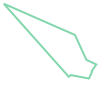

In [72]:
scan_plan[0]

In [73]:
# Convert to projected coordinates to calculate distances accurately
scan_dist = scan_plan.to_crs('epsg:3857').length

print('Distance in meters: {0:,.0f}'.format(scan_dist[0]))
print('Distance in nautical miles: {0:.1f}'.format(m_to_nm(scan_dist[0])))

Distance in meters: 381,773
Distance in nautical miles: 206.1


## Wreckhunting Success!

In [74]:
# Get actual coordinates for where wreck was found
biela = targets.loc[3, :]

b_lat = biela['geometry'].y
b_lon = biela['geometry'].x

In [75]:
# Create basemap
m_final = make_map(layers=layers_all)

# Plot the approximate coordinates for the Biela
folium.Circle([coord_a[0].y, coord_a[0].x], radius=10, color=peach).add_to(m_final)
folium.Circle([coord_b[0].y, coord_b[0].x], radius=10, color=peach).add_to(m_final)

# Create and plot a marker for the Biela
folium.Marker([b_lat, b_lon],
              popup='<b>BIELA</b><br/>Lat: {0:.2f}<br/>Lon: {1:.2f}'.format(b_lat, b_lon),
              icon=folium.map.Icon(icon='ship',
                                   prefix='fa')).add_to(m_final)

# Plot the scan day's plan
scan_fg = folium.FeatureGroup('Search Plan')
lines = folium.PolyLine([(p.y, p.x) for p in stops]).add_to(scan_fg)
scan_fg.add_to(m_final)

# Add LayerControl to toggle layers on/off 
folium.LayerControl(collapsed=False).add_to(m_final)

# Display map
display_map(m_final, 'm_final.html')

## Resources

- [GeoPandas Documentation](https://geopandas.org/docs.html)
- [Shapely Documentation](https://shapely.readthedocs.io/en/stable/manual.html)
- [folium Documentation](https://python-visualization.github.io/folium/index.html)
- [Spatial Reference Systems and EPSG codes](https://www.spatialreference.org/)
- [Get Help on the GIS Stack Exchange](https://gis.stackexchange.com/)